In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [19]:
df = pd.read_csv('train.csv')

In [20]:
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

In [21]:
# Change the data types of multiple columns
df = df.astype({
    'engine_capacity': float,
})

In [22]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year       object
engine_capacity      float64
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
resale_price_Lakh    float64
dtype: object


In [24]:
# create groups: engine_capacity

# defines the groups limit
limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

# new column'engine_capacity_group' 
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [25]:
#on average what is the price based on eng
average_price_by_eng= df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()
print(average_price_by_eng)

engine_capacity_group
Elétrico           33.018049
até 1000 cc         4.352258
até 2000 cc         8.187028
até 3000 cc        20.232041
até 4000 cc        29.984848
mais de 4000 cc    43.310000
Name: resale_price_Lakh, dtype: float64


C:\Users\letic\AppData\Local\Temp\ipykernel_5700\1365649427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_eng= df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()


In [26]:
# frequency of each group 
frequencia_grupos = df['engine_capacity_group'].value_counts()
print(frequencia_grupos)


engine_capacity_group
até 2000 cc        10310
até 1000 cc         2263
até 3000 cc         1279
Elétrico              41
até 4000 cc           33
mais de 4000 cc       21
Name: count, dtype: int64


In [31]:
engine_capacity_group = df['engine_capacity_group'].astype(str)
engine_capacity_group = df['engine_capacity_group'].astype(str).dropna()


In [35]:
#Check ID_engine_capacity

# Sua coluna de tipos de combustível
engine_capacity_group = df['engine_capacity_group']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_engine_capacity_group = engine_capacity_group.drop_duplicates()

for engine_capacity_group_val in unique_engine_capacity_group:
    k = sum(engine_capacity_group_val == val for val in engine_capacity_group)  # contagem de documentos que contêm este tipo de combustível
    idf[engine_capacity_group_val] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for engine_capacity_group_val, value in idf.items():
    print(f'{engine_capacity_group_val:>15}: {value:>10}')

    até 2000 cc: 0.1314601739191855
    até 3000 cc: 1.0375509911282048
    até 1000 cc: 0.7898845382598394
            nan: 4.144760960776074
    até 4000 cc: 2.6132820437338182
       Elétrico: 2.521511670378173
mais de 4000 cc: 2.802338279953867


In [40]:
# Create ID_engine_capacity: IDF

# Sua coluna de tipos de combustível
engine_capacity_group = df['engine_capacity_group']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_engine_capacity_group = engine_capacity_group.drop_duplicates()

for engine_capacity_group_val in unique_engine_capacity_group:
    k = sum(engine_capacity_group_val == val for val in engine_capacity_group)  # contagem de documentos que contêm este tipo de combustível
    idf[engine_capacity_group_val] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for engine_capacity_group_val, value in idf.items():
    print(f'{engine_capacity_group_val:>15}: {value:>10}')

# Criar nova coluna 'id_engine_capacity_group' no DataFrame
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


    até 2000 cc: 0.1314601739191855
    até 3000 cc: 1.0375509911282048
    até 1000 cc: 0.7898845382598394
            nan: 4.144760960776074
    até 4000 cc: 2.6132820437338182
       Elétrico: 2.521511670378173
mais de 4000 cc: 2.802338279953867
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan

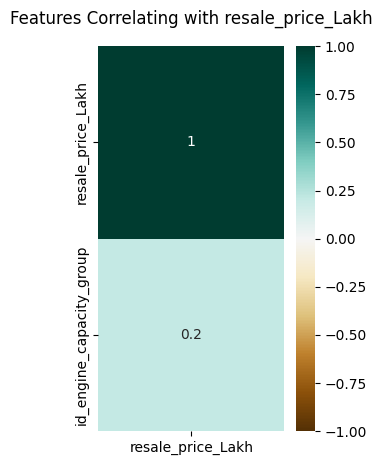

In [41]:
#correlation  

# Select columns
columns_of_interest = ['id_engine_capacity_group', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()